1.Write the Python code to compute entropy and information gain

In [ ]:
#import the required Libraries
import numpy as np
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

**Note:**‘eps’ is the smallest representable number. At times we get log(0) or 0 in the denominator, to avoid that we are going to use this.

In [ ]:
#define the dataset
outlook = 'overcast,overcast,overcast,overcast,rainy,rainy,rainy,rainy,rainy,sunny,sunny,sunny,sunny,sunny'.split(',')
temp = 'hot,cool,mild,hot,mild,cool,cool,mild,mild,hot,hot,mild,cool,mild'.split(',')
humidity = 'high,normal,high,normal,high,normal,normal,normal,high,high,high,high,normal,normal'.split(',')
windy = 'FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE'.split(',')
play = 'yes,yes,yes,yes,yes,yes,no,yes,no,no,no,no,yes,yes'.split(',')

In [ ]:
dataset ={'outlook':outlook,'temp':temp,'humidity':humidity,'windy':windy,'play':play}
df = pd.DataFrame(dataset,columns=['outlook','temp','humidity','windy','play'])
df

,outlook,temp,humidity,windy,play
0,overcast,hot,high,FALSE,yes
1,overcast,cool,normal,TRUE,yes
2,overcast,mild,high,TRUE,yes
3,overcast,hot,normal,FALSE,yes
4,rainy,mild,high,FALSE,yes
5,rainy,cool,normal,FALSE,yes
6,rainy,cool,normal,TRUE,no
7,rainy,mild,normal,FALSE,yes
8,rainy,mild,high,TRUE,no
9,sunny,hot,high,FALSE,no


**step1 : calculate entropy of the whole dataset**

In [ ]:
entropy_node = 0 
values = df.play.unique() 
for value in values:
    fraction = df.play.value_counts()[value]/len(df.play)  
    entropy_node += -fraction*np.log2(fraction)
print(entropy_node)

0.9402859586706309


**step2: define a function {ent} to calculate entropy of each attribute**

In [ ]:
def ent(df,attribute):
    target_variables = df.play.unique()  
    variables = df[attribute].unique()   


    entropy_attribute = 0
    for variable in variables:
        entropy_each_feature = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df.play ==target_variable])
            den = len(df[attribute][df[attribute]==variable])  
            fraction = num/(den+eps)  
            entropy_each_feature += -fraction*log(fraction+eps)
        fraction2 = den/len(df)
        entropy_attribute += -fraction2*entropy_each_feature  

    return(abs(entropy_attribute))

In [ ]:
a_entropy = {k:ent(df,k) for k in df.keys()[:-1]}
a_entropy

{'humidity': 0.7884504573082889,
 'outlook': 0.6935361388961914,
 'temp': 0.9110633930116756,
 'windy': 0.892158928262361}

**step3 : calculate Info gain of each attribute :**

In [ ]:
def ig(e_dataset,e_attr):
    return(e_dataset-e_attr)

In [ ]:

IG = {k:ig(entropy_node,a_entropy[k]) for k in a_entropy}
IG

{'humidity': 0.15183550136234203,
 'outlook': 0.24674981977443955,
 'temp': 0.029222565658955313,
 'windy': 0.04812703040826993}

**outlook has the highest info gain of 0.24 , therefore we will select outook as the node at this level for splitting.**

#2.Write the  Python code to demonstrate conditional probability

In [ ]:
from itertools import product #to get cartesian product

In [ ]:
#example 
list(product([1,2],['a','b','c']))

[(1, 'a'), (1, 'b'), (1, 'c'), (2, 'a'), (2, 'b'), (2, 'c')]

In [ ]:
n = 3 
samplespace = set(product(['H','T'],repeat=n))
samplespace

{('H', 'H', 'H'),
 ('H', 'H', 'T'),
 ('H', 'T', 'H'),
 ('H', 'T', 'T'),
 ('T', 'H', 'H'),
 ('T', 'H', 'T'),
 ('T', 'T', 'H'),
 ('T', 'T', 'T')}

In [ ]:
len(samplespace) 

8

In [ ]:
A = { x for x in samplespace if x[0] == 'T'} 
A

{('T', 'H', 'H'), ('T', 'H', 'T'), ('T', 'T', 'H'), ('T', 'T', 'T')}

In [ ]:
B = { x for x in samplespace if x.count('T')==2} 
B

{('H', 'T', 'T'), ('T', 'H', 'T'), ('T', 'T', 'H')}

In [ ]:
def prob(X):
  return len(X) / len(samplespace)

In [ ]:
def cond_prob(X,Y):
  return len(X & Y) / len(Y)

In [ ]:
prob(A)

0.5

In [ ]:
prob(B)

0.375

In [ ]:
cond_prob(A,B)

0.6666666666666666

#3. Write the  Python code to compute Euclidean Distance between data points

In [ ]:
import numpy as np 
  
# intializing points in 
# numpy arrays 
point1 = np.array([3, 4]) 
point2 = np.array([2, 2]) 
  
# calculating Euclidean distance 
# using linalg.norm() 
dist = np.linalg.norm(point1 - point2) 
  
# printing Euclidean distance 
print(dist) 

2.23606797749979


#4. Write the  Python code to calculate covariance matrix, Eigen values and Eigen vectors

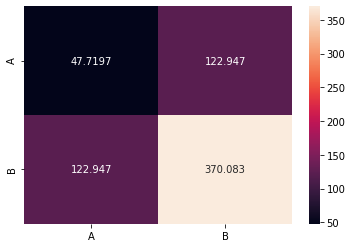

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'A': [9,15,25,14,10,18,0,16,5,19,16,20],
        'B': [39,56,93,61,50,75,32,85,42,70,66,80]    
        }

df = pd.DataFrame(data,columns=['A','B'])

covMatrix = pd.DataFrame.cov(df)
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()


In [ ]:
# importing numpy library 
import numpy as np 
  
# create a covariance matix array
c = covMatrix.values
  
print("Printing the covariance matrix:\n", 
      c) 
  
# finding eigenvalues and eigenvectors 
eval, evec = np.linalg.eig(c) 
  
# printing eigen values 
print("Printing the Eigen values of the given covariance matric:\n", eval) 
  
# printing eigen vectors 
print("Printing Right eigenvectors of the given covariance matrix:\n",evec)

Printing the covariance matrix:
 [[ 47.71969697 122.9469697 ]
 [122.9469697  370.08333333]]
Printing the Eigen values of the given covariance matric:
 [  6.18117609 411.62185422]
Printing Right eigenvectors of the given covariance matrix:
 [[-0.94738969 -0.32008244]
 [ 0.32008244 -0.94738969]]


# 5.Write the  Python code to calculate the following <br>
# Accuracy <br>
# Misclassification <br>
# Type-1 and Type-2 error rates <br>
# Sensitivity
# Specificity

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
ytest = [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0 ,0, 1, 1, 0, 0, 0]
ypred = [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
cm= metrics.confusion_matrix(ytest, ypred)
print(cm)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

[[15  1]
 [ 7  2]]


In [ ]:
#Accuracy (all correct / all) = TP + TN / TP + TN + FP + FN
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(ytest, ypred))

0.68
0.68


In [ ]:
#Misclassification (all incorrect / all) = FP + FN / TP + TN + FP + FN
misclassification = (FP + FN) / float(TP + TN + FP + FN)

print(misclassification)
print(1 - metrics.accuracy_score(ytest, ypred))

0.32
0.31999999999999995


In [ ]:
#type 1 error rate = FP/FP+TN
type1error_rate = FP / float(FP + TN)
type1error_rate

0.0625

In [ ]:
#type 2 error rate = FN/FN+TP
type2error_rate = FN / float(FN + TP)
type2error_rate

0.7777777777777778

In [ ]:
#Sensitivity aka Recall (true positives / all actual positives) = TP / TP + FN
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(ytest, ypred))

0.2222222222222222
0.2222222222222222


In [ ]:
#Specificity (true negatives / all actual negatives) =TN / TN + FP
specificity = TN / (TN + FP)

print(specificity)

0.9375
